In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('College_Data.csv')
data_old = data.copy()
data.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [30]:
data = data_old.drop('Unnamed: 0', axis=1)
data.head(1)

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60

In [31]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

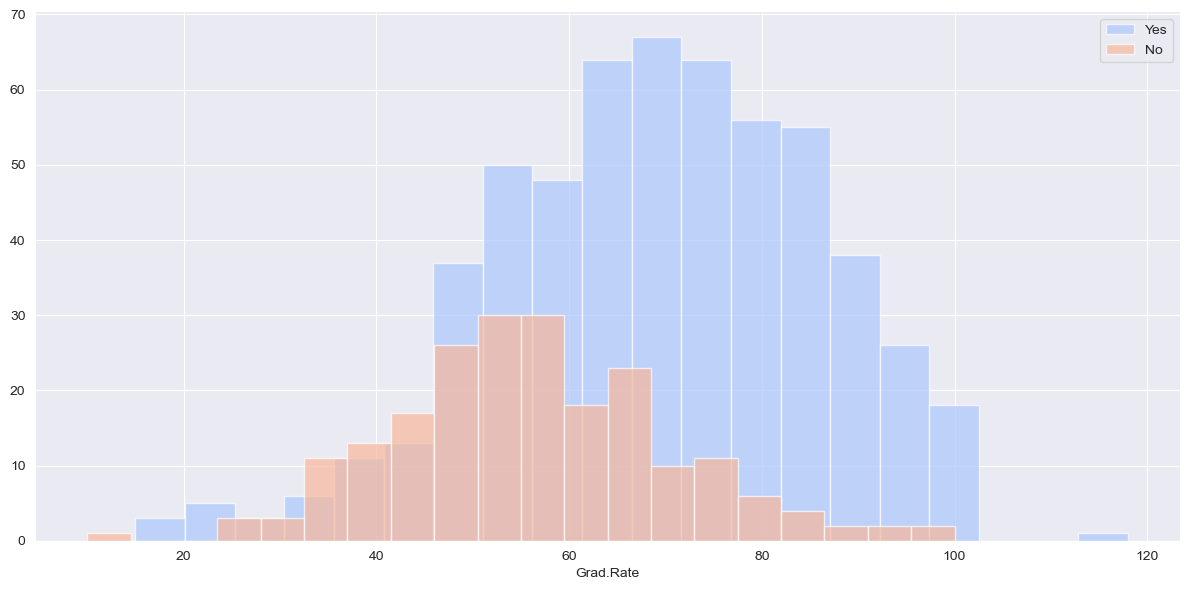

In [32]:
g = sns.FacetGrid(data, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.legend()

In [33]:
data[data['Grad.Rate'] > 100]

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
95     Yes  3847    3433     527          9         35         1010   

    P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
95           12      9384        4840    600       500   22        47   

    S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95       14.3           20    7697        118

In [34]:
data['Grad.Rate'][95] = 18

In [35]:
data[data['Grad.Rate'] > 100]

Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

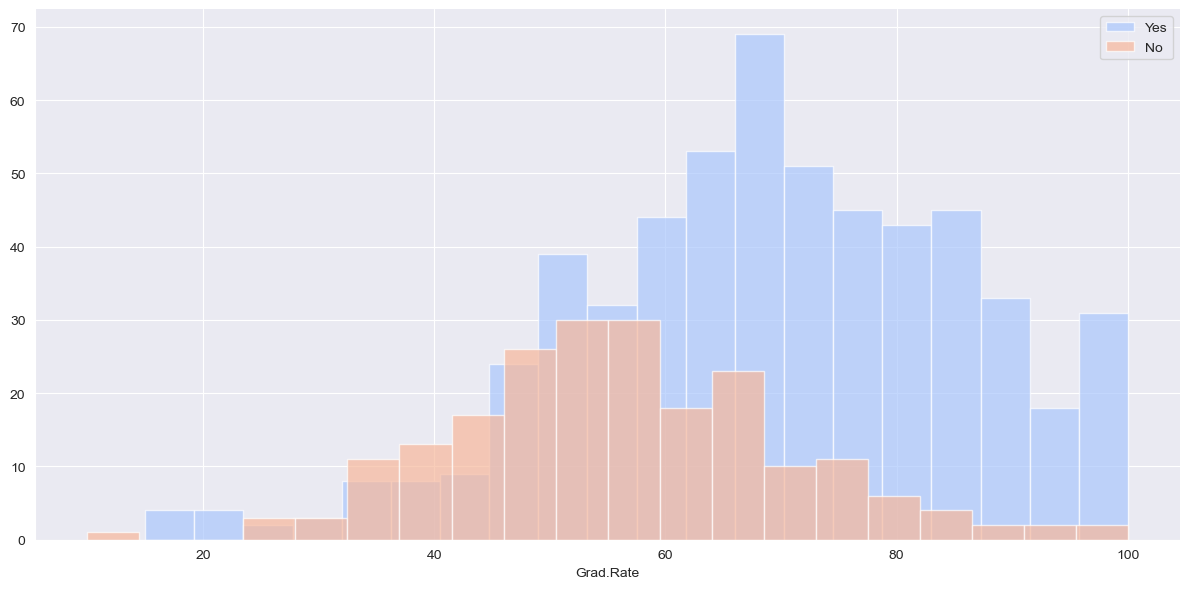

In [36]:
g = sns.FacetGrid(data, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.legend()

In [37]:
# 407 - NYU, 605 - Berkley, 775 - Yale, 337 - Manchester College
indices=[407,605,775,337]
samples=pd.DataFrame(data.loc[indices],columns=data.keys()).reset_index(drop=True)
display(samples)

Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  13594    7244    2505         70         86        12408   
1      No  19873    8252    3215         95        100        19532   
2     Yes  10705    2453    1317         95         99         5217   
3     Yes   1004     802     239         23         63          909   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0         2814     17748        7262    450      1000   87        98   
1         2061     11648        6246    636      1933   93        97   
2           83     19840        6510    630      2115   96        96   
3           51     10440        3850    525      1450   63        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        7.8           16   21227         71  
1       15.8           10   13919         78  
2        5.8           49   40386         99  
3       11.8           20    7940         64

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
407     63.7  97.0    95.9    94.1       95.8       91.1         92.5   
605     13.7  99.6    96.9    96.7       99.7       99.6         98.1   
775     63.7  94.6    75.4    83.0       99.7       98.8         79.7   
337     63.7  35.8    36.4    24.6       48.8       65.7         20.9   

     P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  Terminal  \
407         93.4      93.2        99.2   20.8      35.9  78.3      95.1   
605         90.3      65.9        93.7   83.1      83.5  92.1      92.1   
775         23.5      99.4        96.4   81.7      88.5  97.1      88.7   
337         15.5      53.7        36.0   51.5      63.4  26.8      27.3   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  
407        4.2         34.9    96.9       62.4  
605       70.3         16.4    87.1       75.5  
775        1.5         96.8    99.5       98.5  
337       28.6         47.5    43.8       46.5

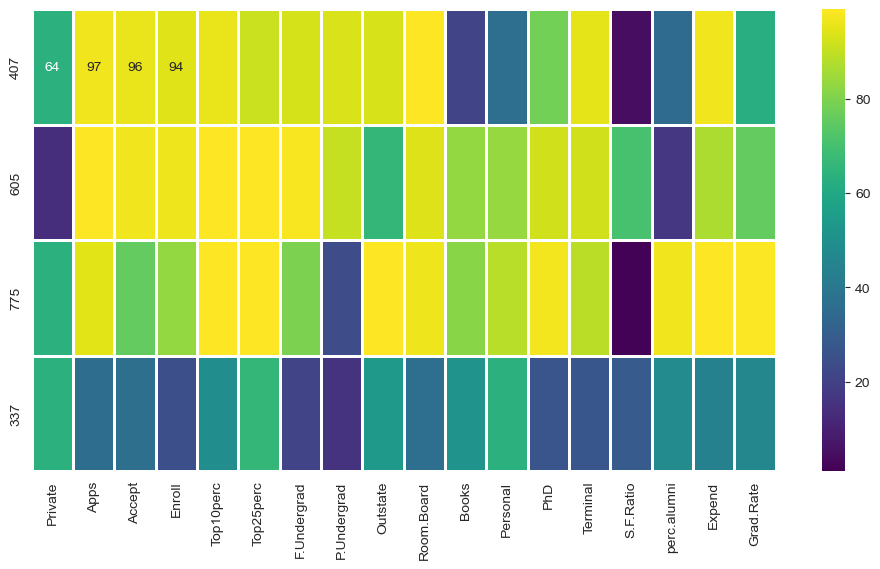

In [38]:
percentiles=data.rank(pct=True)
percentiles=(percentiles*100).apply(lambda x:np.round(x,decimals=1))
percentiles.head()
percentiles=percentiles.iloc[indices]
plt.figure(figsize=(12,6))
sns.heatmap(percentiles,vmin=1,vmax=99,annot=True,cmap='viridis',
           linecolor='white',linewidths=1)
display(percentiles)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [40]:
X = data.drop('Private', axis=1)

In [41]:
X.keys()

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [42]:
for i in X.keys():
    new_data = X.drop(i, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, X[i], test_size=0.3, random_state=101)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    pred = regressor.predict(X_test)
    score = r2_score(y_test, pred)
    print(i, ' score is', score)

Apps  score is 0.8822763697496229
Accept  score is 0.9321347298886808
Enroll  score is 0.8792801553907704
Top10perc  score is 0.776320713453729
Top25perc  score is 0.6539202439927303
F.Undergrad  score is 0.8993352909611628
P.Undergrad  score is 0.1165576945689556
Outstate  score is 0.598610220786176
Room.Board  score is 0.11767690615490123
Books  score is -0.49193024501044835
Personal  score is -0.42951311955289895
PhD  score is 0.559746402067153
Terminal  score is 0.4610003367559551
S.F.Ratio  score is 0.0735370081238933
perc.alumni  score is 0.051205427150402216
Expend  score is 0.48352390110053034
Grad.Rate  score is -0.24020315288107286


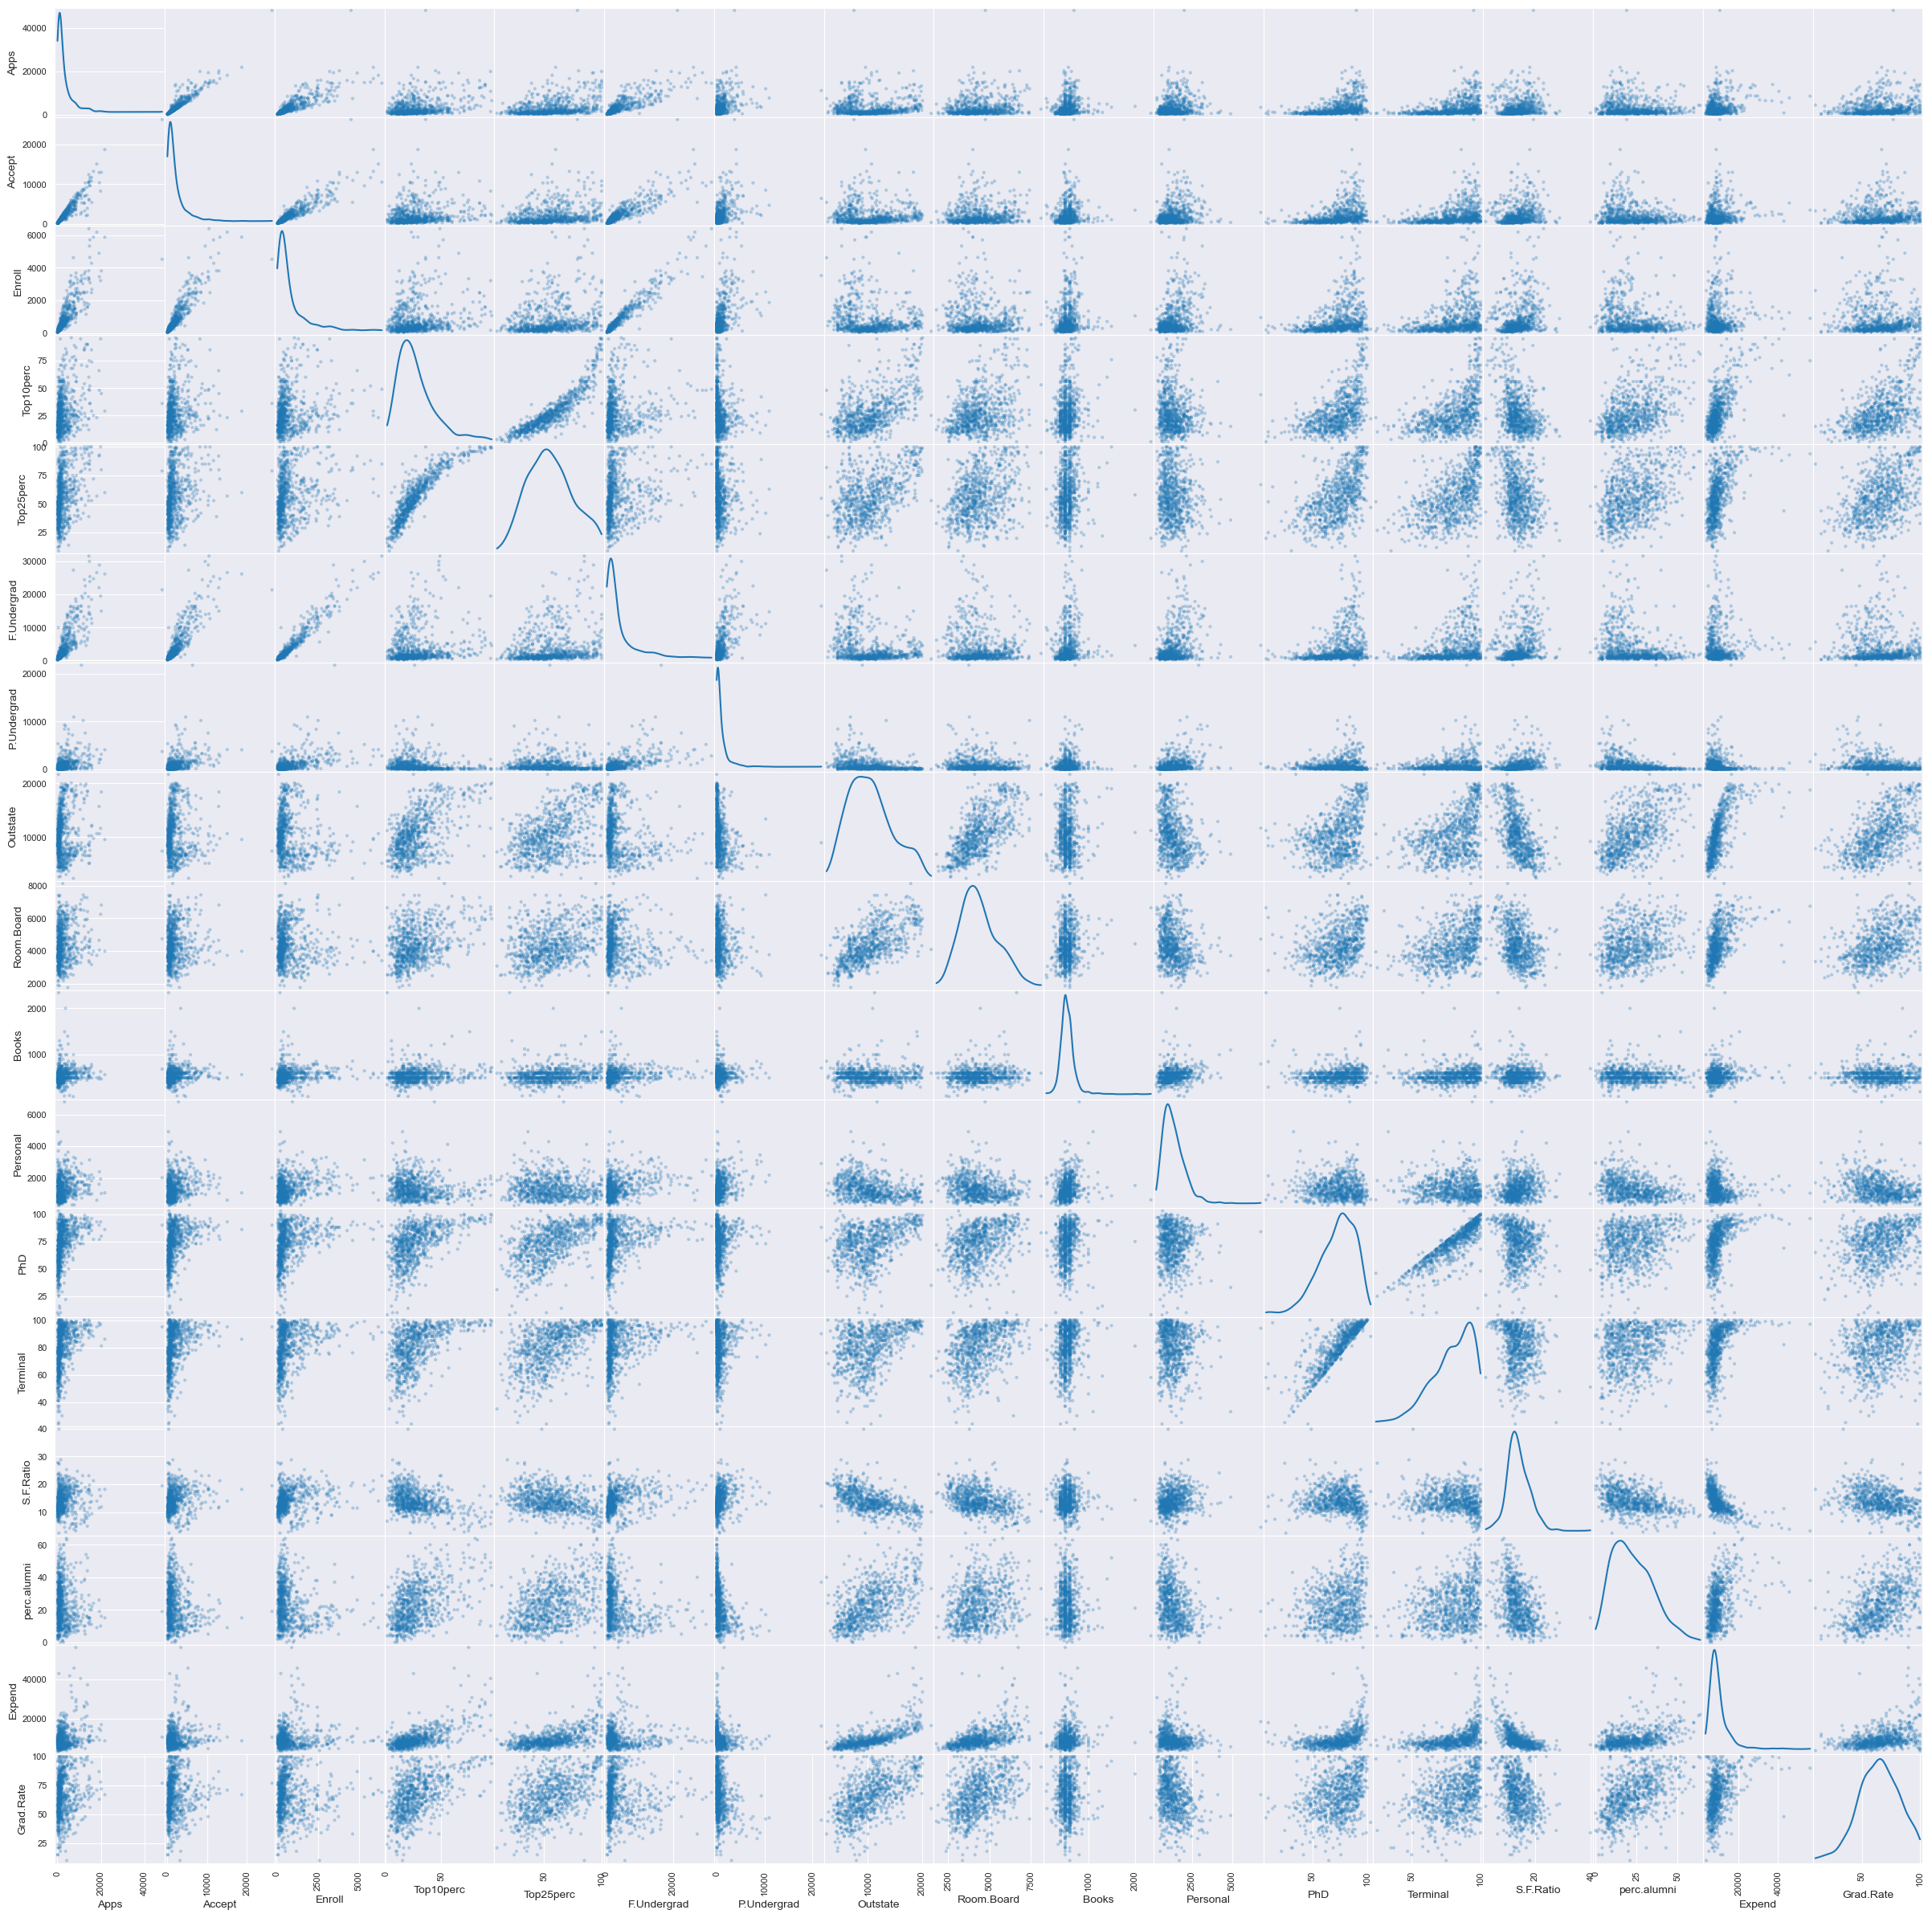

In [43]:
pd.plotting.scatter_matrix(X, alpha=0.3, figsize=(30,30), diagonal='kde')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Apps'),
  Text(1, 0, 'Accept'),
  Text(2, 0, 'Enroll'),
  Text(3, 0, 'Top10perc'),
  Text(4, 0, 'Top25perc'),
  Text(5, 0, 'F.Undergrad'),
  Text(6, 0, 'P.Undergrad'),
  Text(7, 0, 'Outstate'),
  Text(8, 0, 'Room.Board'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Personal'),
  Text(11, 0, 'PhD'),
  Text(12, 0, 'Terminal'),
  Text(13, 0, 'S.F.Ratio'),
  Text(14, 0, 'perc.alumni'),
  Text(15, 0, 'Expend'),
  Text(16, 0, 'Grad.Rate')])

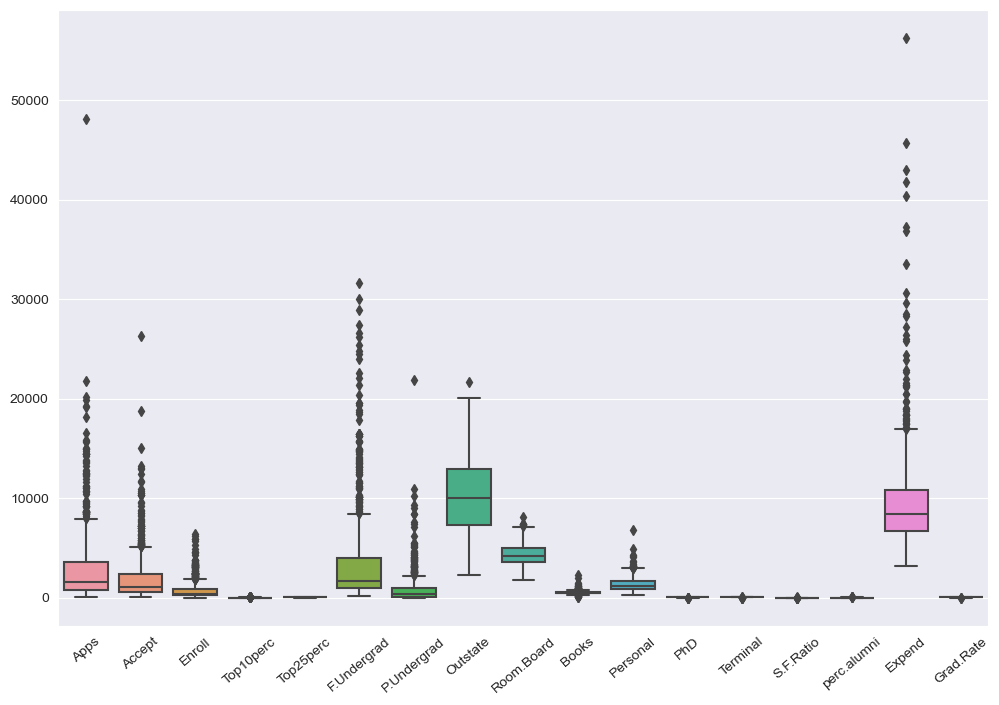

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(X)
plt.xticks(rotation=40)

In [45]:
outliers=np.array([],dtype='int64')
for feature in X.keys():
    Q1=np.percentile(X[feature],25)
    Q3=np.percentile(X[feature],75)
    step=(Q3-Q1)*3
    print('Data points considered outliers for the feature %s are:' %feature)
    outliers_pts=X[~((X[feature]>=Q1-step)&
                     (X[feature]<=Q3+step))]
    outliers=np.append(outliers,
                       outliers_pts.index.values.astype('int64'))
    #display(outliers)
    display(outliers_pts.index.values.astype('int64'))

Data points considered outliers for the feature Apps are:


array([ 23,  59,  70, 174, 250, 274, 366, 407, 424, 445, 459, 461, 483,
       560, 561, 562, 563, 581, 605, 606, 614, 619, 623, 633, 634, 637,
       651, 663, 677, 685, 693, 694, 700, 713], dtype=int64)

Data points considered outliers for the feature Accept are:


array([ 23,  59, 203, 274, 366, 418, 432, 445, 461, 483, 560, 562, 581,
       605, 606, 614, 619, 623, 633, 634, 637, 677, 685, 700, 713],
      dtype=int64)

Data points considered outliers for the feature Enroll are:


array([ 23,  27,  59,  61,  69, 203, 273, 274, 277, 324, 365, 366, 412,
       432, 445, 461, 483, 536, 562, 581, 605, 614, 619, 620, 623, 626,
       633, 634, 637, 640, 642, 647, 651, 683, 685, 694, 700, 713],
      dtype=int64)

Data points considered outliers for the feature Top10perc are:


array([354], dtype=int64)

Data points considered outliers for the feature Top25perc are:


array([], dtype=int64)

Data points considered outliers for the feature F.Undergrad are:


array([ 23,  27,  59,  61,  69,  79, 141, 176, 203, 269, 274, 277, 288,
       324, 365, 366, 412, 420, 432, 445, 461, 483, 510, 536, 562, 581,
       605, 614, 619, 620, 623, 624, 626, 633, 634, 637, 640, 642, 647,
       651, 657, 661, 664, 676, 677, 683, 685, 691, 694, 700, 713, 727,
       743], dtype=int64)

Data points considered outliers for the feature P.Undergrad are:


array([ 23, 102, 142, 201, 218, 223, 303, 324, 366, 412, 418, 427, 440,
       461, 482, 483, 510, 603, 607, 614, 628, 633, 640, 644, 656, 657,
       664, 675, 676, 684, 685, 686, 691, 694, 701, 711, 743], dtype=int64)

Data points considered outliers for the feature Outstate are:


array([], dtype=int64)

Data points considered outliers for the feature Room.Board are:


array([], dtype=int64)

Data points considered outliers for the feature Books are:


array([ 34,  60,  63, 100, 257, 317, 368, 373, 464, 471, 513, 573, 578,
       687, 690, 737], dtype=int64)

Data points considered outliers for the feature Personal are:


array([368, 497, 644], dtype=int64)

Data points considered outliers for the feature PhD are:


array([], dtype=int64)

Data points considered outliers for the feature Terminal are:


array([], dtype=int64)

Data points considered outliers for the feature S.F.Ratio are:


array([275], dtype=int64)

Data points considered outliers for the feature perc.alumni are:


array([], dtype=int64)

Data points considered outliers for the feature Expend are:


array([ 20,  87, 144, 158, 174, 191, 250, 284, 354, 424, 459, 609, 663,
       669, 708, 720, 728, 775], dtype=int64)

Data points considered outliers for the feature Grad.Rate are:


array([], dtype=int64)

In [46]:
unique_outliers, indices = np.unique(outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = unique_outliers[counts > 1]
outliers

array([ 23,  27,  59,  61,  69, 174, 203, 250, 274, 277, 324, 354, 365,
       366, 368, 412, 418, 424, 432, 445, 459, 461, 483, 510, 536, 560,
       562, 581, 605, 606, 614, 619, 620, 623, 626, 633, 634, 637, 640,
       642, 644, 647, 651, 657, 663, 664, 676, 677, 683, 685, 691, 694,
       700, 713, 743], dtype=int64)

In [47]:
good_data = X.drop(X.index[outliers]).reset_index(drop=True)
data_old_1 = data_old.drop(X.index[outliers]).reset_index(drop=True)

In [48]:
print(good_data.shape)
print(data_old_1.shape)

(722, 17)
(722, 19)


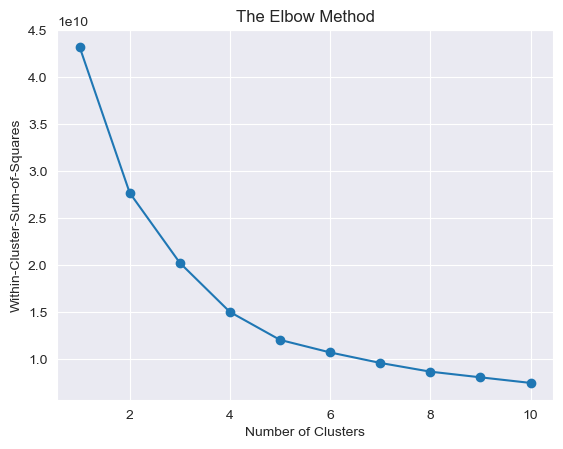

In [49]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(good_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

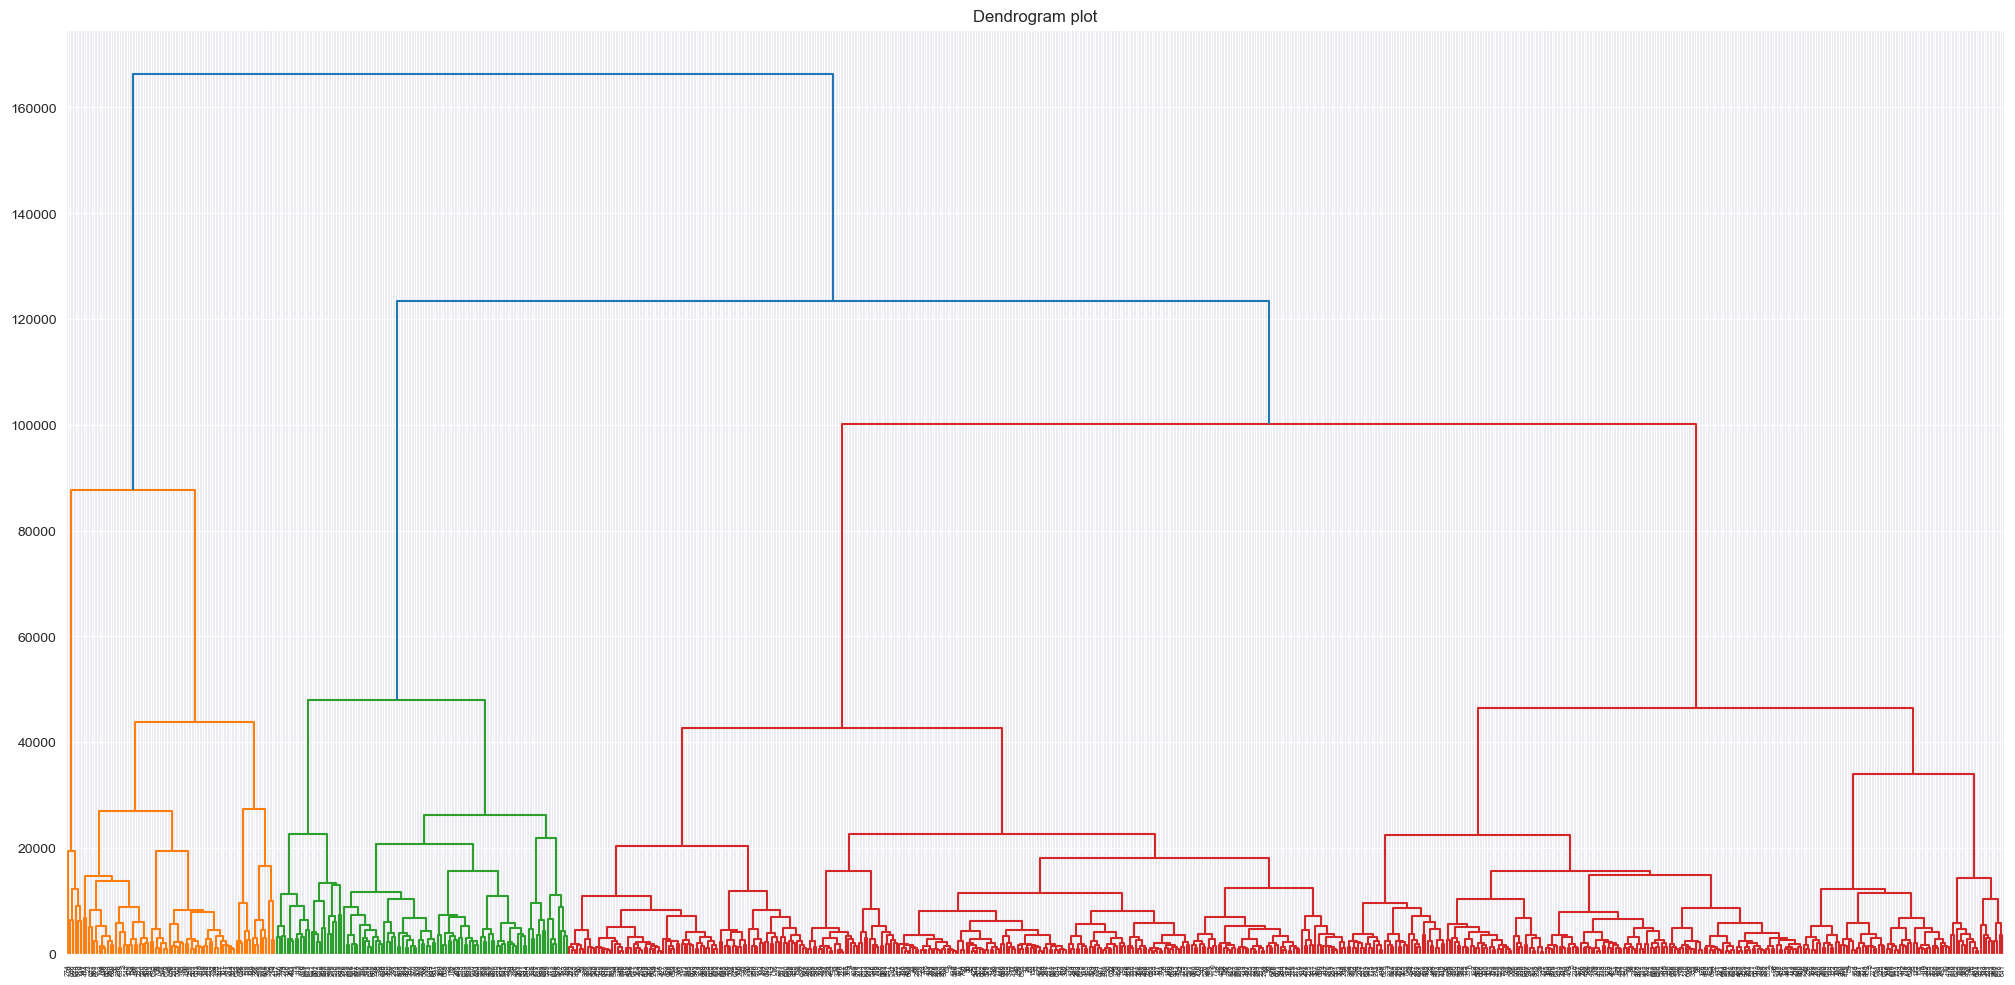

In [50]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(good_data,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
for i in range(2,10):
    X = good_data.values
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(X)
    print(f'{i} score is {silhouette_score(X,y_kmeans)}')

2 score is 0.4424373407996065
3 score is 0.4235978576203681
4 score is 0.41786635294523244
5 score is 0.3188424247613244
6 score is 0.28461546131896714
7 score is 0.3023757812892445
8 score is 0.2718510726398396
9 score is 0.26906746388797076


In [53]:
X = good_data.values
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

In [54]:
details = [(name, cluster) for name, cluster in zip(data_old_1['Unnamed: 0'], y_kmeans)]
labels = ['University/College Name', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(10)

University/College Name  Cluster
0  Abilene Christian University        1
1            Adelphi University        1
2                Adrian College        1
3           Agnes Scott College        0
4     Alaska Pacific University        1
5             Albertson College        1
6       Albertus Magnus College        1
7                Albion College        1
8              Albright College        0
9     Alderson-Broaddus College        1

In [55]:
df[df['Cluster']==0]

University/College Name  Cluster
3                Agnes Scott College        0
8                   Albright College        0
10                 Alfred University        0
11                 Allegheny College        0
16                   Amherst College        0
..                               ...      ...
701                 Whittier College        0
708                 Williams College        0
714            Wittenberg University        0
716  Worcester Polytechnic Institute        0
720                  Yale University        0

[133 rows x 2 columns]

In [56]:
df[df['Cluster']==1]

University/College Name  Cluster
0      Abilene Christian University        1
1                Adelphi University        1
2                    Adrian College        1
4         Alaska Pacific University        1
5                 Albertson College        1
..                              ...      ...
715                 Wofford College        1
717         Worcester State College        1
718               Xavier University        1
719  Xavier University of Louisiana        1
721    York College of Pennsylvania        1

[473 rows x 2 columns]

In [57]:
df[df['Cluster']==2]

University/College Name  Cluster
19            Angelo State University        2
21       Appalachian State University        2
37                  Baylor University        2
54   Bloomsburg Univ. of Pennsylvania        2
73    California Polytechnic-San Luis        2
..                                ...      ...
673       Washington State University        2
684  West Chester University of Penn.        2
687       Western Carolina University        2
691     Western Washington University        2
711           Winona State University        2

[116 rows x 2 columns]

In [58]:
df = pd.DataFrame(data_old.loc[outliers])
df = df.dropna()
df.reset_index()

index                                   Unnamed: 0 Private   Apps  Accept  \
0      23         Arizona State University Main campus      No  12809   10308   
1      27                Auburn University-Main Campus      No   7548    6791   
2      59                            Boston University     Yes  20192   13007   
3      61               Bowling Green State University      No   9251    7333   
4      69            Brigham Young University at Provo     Yes   7365    5402   
5     174                              Duke University     Yes  13789    3893   
6     203                     Florida State University      No  11651    8683   
7     250                           Harvard University     Yes  13865    2165   
8     274            Indiana University at Bloomington      No  16587   13243   
9     277                        Iowa State University      No   8427    7424   
10    324    Louisiana State University at Baton Rouge      No   5996    4993   
11    354        Massachusetts Institute of Technology     Yes   6411    2140   
12    365                   Miami University at Oxford      No   9239    7788   
13    366                    Michigan State University      No  18114   15096   
14    368                  MidAmerica Nazarene College     Yes    331     331   
15    412   North Carolina State University at Raleigh      No  10634    7064   
16    418                      Northeastern University     Yes  11901    8492   
17    424                      Northwestern University     Yes  12289    5200   
18    432                              Ohio University      No  11023    8298   
19    445         Pennsylvania State Univ. Main Campus      No  19315   10344   
20    459                         Princeton University     Yes  13218    2042   
21    461          Purdue University at West Lafayette      No  21804   18744   
22    483                     Rutgers at New Brunswick      No  48094   26330   
23    510                   San Diego State University      No   9402    7020   
24    536          Southwest Missouri State University      No   6118    5254   
25    560                               SUNY at Albany      No  13528    9198   
26    562                              SUNY at Buffalo      No  15039    9649   
27    581           Texas A&M Univ. at College Station      No  14474   10519   
28    605         University of California at Berkeley      No  19873    8252   
29    606           University of California at Irvine      No  15698   10775   
30    614                       University of Delaware     Yes  14446   10516   
31    619                        University of Florida      No  12445    8836   
32    620                        University of Georgia      No  11220    7871   
33    623              University of Illinois - Urbana      No  14939   11652   
34    626                         University of Kansas      No   8579    5561   
35    633       University of Maryland at College Park      No  14292   10315   
36    634       University of Massachusetts at Amherst      No  14438   12414   
37    637          University of Michigan at Ann Arbor      No  19152   12940   
38    640          University of Minnesota Twin Cities      No  11054    6397   
39    642           University of Missouri at Columbia      No   6574    4637   
40    644        University of Missouri at Saint Louis      No   1618    1141   
41    647            University of Nebraska at Lincoln      No   6277    6003   
42    651  University of North Carolina at Chapel Hill      No  14596    5985   
43    657                    University of North Texas      No   4418    2737   
44    663                   University of Pennsylvania     Yes  12394    5232   
45    664         University of Pittsburgh-Main Campus      No   8586    6383   
46    676                  University of South Florida      No   7589    4676   
47    677            University of Southern California     Yes  12229    8498   
48    683         University of Ten

In [59]:
df['Private'].value_counts()

Private
No     43
Yes    12
Name: count, dtype: int64

In [60]:
X.shape

(722, 17)

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [63]:
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.59508649, 0.25456305])

In [64]:
X.shape

(722, 2)

Text(0, 0.5, 'Component 2')

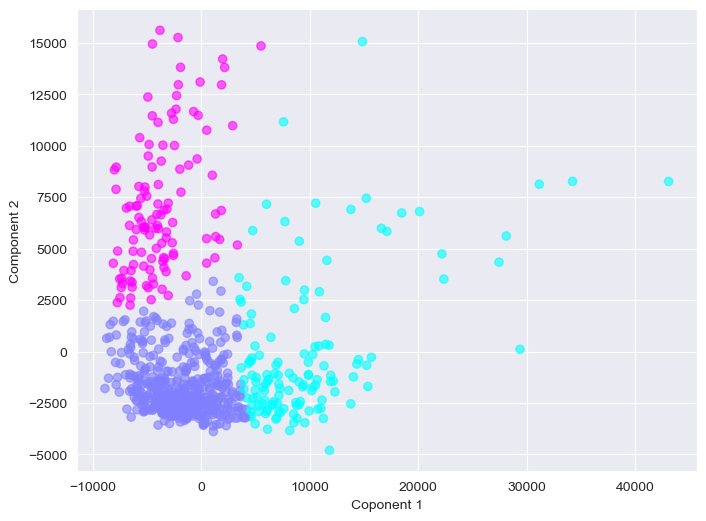

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='cool', alpha=0.6)
plt.xlabel('Coponent 1')
plt.ylabel('Component 2')

In [ ]:
import visual as vs
pca_results = vs.

AttributeError: module 'visuals' has no attribute 'pca_results'

In [73]:
import visuals as vs
print(dir(vs))


['Add', 'Anime', 'Banner', 'Box', 'Center', 'Col', 'Colorate', 'Colors', 'Cursor', 'Fade', 'MIDDOT', 'Structure', 'System', 'Write', '_CursorInfo', '_MakeColors', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_name', '_sleep', '_stdout', '_system', '_terminal_size', '_thread', 'banner0', 'banner3', 'banner3d', 'banner4', 'banner_5x7', 'banner_5x8', 'banner_6x10', 'banner_6x9', 'banner_clb6x10', 'banner_clb8x10', 'banner_clb8x8', 'banner_clr4x6', 'banner_clr5x10', 'banner_clr5x6', 'banner_clr5x8', 'banner_clr6x10', 'banner_clr6x6', 'banner_clr6x8', 'banner_clr7x10', 'banner_clr7x8', 'banner_clr8x10', 'banner_clr8x8', 'byref', 'c_byte', 'c_int', 'terminal_size', 'windll']
